In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

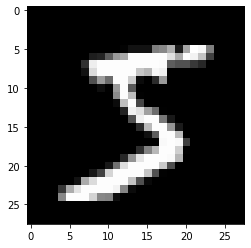

In [6]:
plt.imshow(x_train[0],cmap='gray')

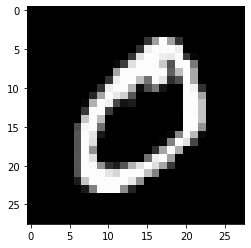

In [12]:
plt.imshow(x_train[1],cmap='gray')

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
enc = OneHotEncoder(categories='auto', sparse=False)
y_train_en = enc.fit_transform(y_train.reshape(-1,1))
y_train_en

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [22]:
from keras.utils.np_utils import to_categorical
import numpy as np
y_test_en = np.float64(to_categorical(y_test, 10))
y_test_en

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
x_train = x_train/255
x_test = x_test/255

In [25]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [27]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
his = model.fit(x_train, y_train_en, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 30s 15ms/step - loss: 0.1399 - accuracy: 0.9574
Epoch 2/2
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0486 - accuracy: 0.9855


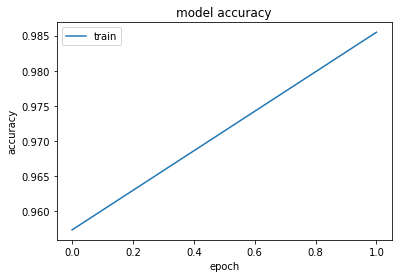

In [42]:
# summarize history for accuracy
plt.plot(his.history['accuracy'])
#plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

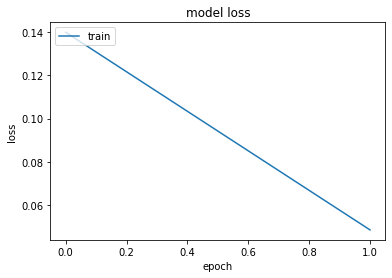

In [43]:
# summarize history for loss
plt.plot(his.history['loss'])
#plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
model.evaluate(x_test, y_test_en)

313/313 [==============================] - 1s 3ms/step - loss: 0.0404 - accuracy: 0.9881


[0.040369026362895966, 0.988099992275238]

In [32]:
from sklearn.metrics import classification_report

In [33]:
predict = his.model.predict(x_test)

In [36]:
np.argmax(predict,axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [37]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [39]:
print(classification_report(y_test, np.argmax(predict,axis=1)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       1.00      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

